## On chain Analysis
---
https://ecoinometrics.substack.com/p/ecoinometrics-market-sentiment

In [5]:
# import my package
import sys
sys.path.insert(1, '../')
from helper import plots, calc

# imoprt otros paquetes
import pandas as pd
import numpy as np
import json 
import seaborn as sns
import os
import re
from pylab import mpl, plt

In [6]:
# Functions
def json_to_df(file_dir, col_name="price"):
    "reads file json and format to use, suppose glassnode source"
    df = pd.read_json(file_dir)
    df.columns = ["time", col_name]
    df["time"] = pd.to_datetime(df["time"])
    df.set_index("time", inplace=True)
    return df

diff_month = lambda x: x.iloc[-1] - x.iloc[0]

def rango_percentilar(mydata, col_name, idx):
    return np.mean(mydata[f"{col_name}"].to_numpy() <= mydata[f"{col_name}"].iloc[idx])


def to_percentile(mydata, col_name):
    mydata = mydata.copy()
    mydata = mydata.reset_index()
    percentiles = [ ]
    for idx, series in mydata.iterrows():
        res = rango_percentilar(mydata, col_name, idx)
        percentiles.append(res)
    mydata[f"{col_name}_percentile"] = percentiles
    return mydata



def plot_mayer(mydata, x="time", y="price", hue="Mayer_percentile"):
    f, ax = plt.subplots(figsize=(15, 11))
    sns.despine(f, left=True, bottom=True)
    sns.scatterplot(x, y,
                    hue=hue, 
                    sizes=(10, 20),
                    alpha=.5,
                    palette="rocket", 
                    data=mydata, ax=ax)



In [51]:
# Reading Files
files =  [json_to_df('./data/'+f, col_name=f)  for f in os.listdir('./data') if re.match(r'addresses*', f)]

# reorganizando columnas
data = files[0].join(files[1:])
data.columns = ["10-btc", "100-btc", "1-k-btc" ,  "1-btc", "0-btc", "0-01-btc", "0-1-btc"]
data = data[["0-btc", "0-01-btc", "0-1-btc",  "1-btc",  "10-btc",  "100-btc", "1-k-btc"  ]]

# Agrupación
fisher = pd.DataFrame()
fisher["0-1btc"] = data["0-btc"] - data["1-btc"] #Personas con entre 0-1 bitcoin
fisher["1-10btc"] = data["1-btc"] - data["10-btc"] 
fisher["10-100btc"] = data["10-btc"] - data["100-btc"] 
fisher["100-1kbtc"] = data["100-btc"] - data["1-k-btc"] 

In [36]:


#Differnce over 30days
diff_30 = data.rolling(10).apply(diff_month)
col1 = diff_30.columns[6]


diff_30 = to_percentile(diff_30, col1)
diff_30.set_index("time", inplace=True)

df = json_to_df("./price-btc-24h.json")
analisis = diff_30.join(df)

x1 = analisis.shape[0]
x2 = analisis[analisis[col1+"_percentile"]>0.8 ].shape[0]

ValueError: Expected object or value

/home/matias/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


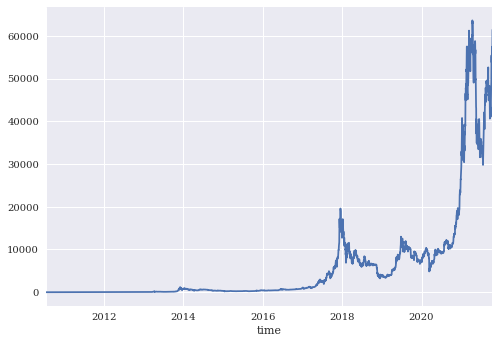

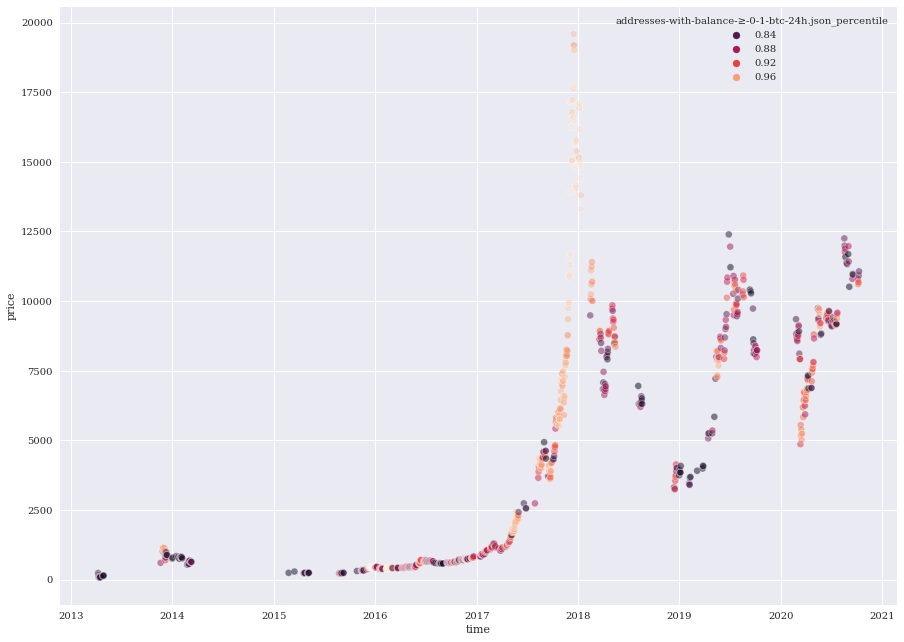

In [134]:
df.price.plot.line()
plot_mayer(analisis[analisis[col1+"_percentile"]>0.8 ], y="price", hue=col1+"_percentile" )
